In [25]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

## Exercise 1


$\overline{K} = \alpha \beta^{\frac{1}{1-\alpha}}$  
$F=\frac{\alpha \overline{K}^{\alpha-1}}{\overline{K}^{\alpha}-\overline{K}}$  
$G=-\frac{\alpha \overline{K}^{\alpha-1}\left(\alpha+\overline{K}^{\alpha-1}\right)}{\overline{K}^{\alpha}-\overline{K}}$  
$H=\frac{\alpha^{2} \overline{K}^{2(\alpha-1)}}{\overline{K}^{\alpha}-\overline{K}}$  
$L=-\frac{\alpha \overline{K}^{2 \alpha-1}}{\overline{K}^{\alpha}-\overline{K}}$  
$M=\frac{\alpha^{2} \overline{K}^{2(\alpha-1)}}{\overline{K}^{\alpha}-\overline{K}}$  
$N=I_{n_z}$, exogenous, determines the law of motion.

In [19]:
def policy(α, β, ρ, K0, z0):
    Kbar = (α * β)**(1/(1-α))
    F = α*Kbar**(α-1)/(Kbar**α - Kbar)
    G = -α*Kbar**(α-1)*(α+Kbar**(α-1))/(Kbar**α - Kbar)
    H = α**2*Kbar**(2*(α-1))/(Kbar**α - Kbar)
    L = -α*Kbar**(2*α-1)/(Kbar**α - Kbar)
    M = α**2*Kbar**(2*(α-1))/(Kbar**α - Kbar)
    N = ρ
    
    P1 = (-G + np.sqrt(G**2 - 4*F*H))/(2*F)
    P2 = (-G - np.sqrt(G**2 - 4*F*H))/(2*F)
    Q1 = -(L*N + M)/(F*N+F*P1+G)
    Q2 = -(L*N + M)/(F*N+F*P2+G)
    
    K1 = Kbar + P1*(K0 - Kbar) + Q1*z0
    K2 = Kbar + P2*(K0 - Kbar) + Q2*z0
    
    return K1, K2

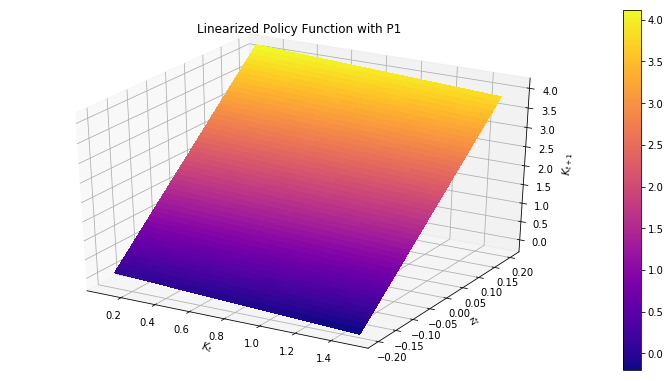

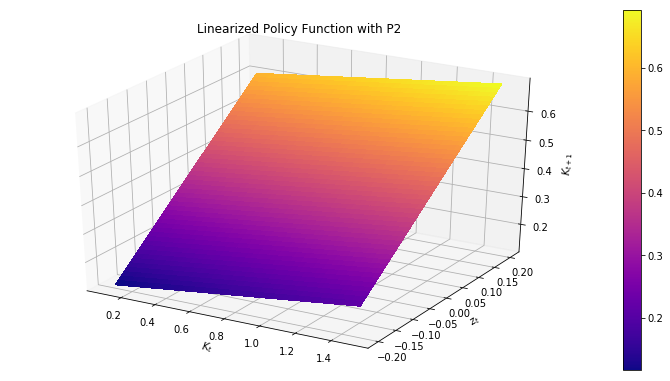

In [48]:
α = 0.35
β = 0.98
ρ = 0.95
σ = 0.02

numpoints = 50
Kmax = 1.5
Kmin = 0.1
zmax = 10 * σ
zmin = -10 * σ
K_grid = np.linspace(Kmin, Kmax, 50)
z_grid = np.linspace(zmin, zmax, 50)

KK, ZZ = np.meshgrid(K_grid, z_grid)

policy_value1 = np.zeros((numpoints, numpoints))
policy_value2 = np.zeros((numpoints, numpoints))
for i in range(numpoints):
    policy_value1[i,:] = policy(α, β, ρ, K_grid[i], z_grid)[0]
    policy_value2[i,:] = policy(α, β, ρ, K_grid[i], z_grid)[1]

fig = plt.figure(figsize = (10,5))
ax = Axes3D(fig)
surf = ax.plot_surface(KK, ZZ, policy_value1, cmap='plasma', linewidth=0, antialiased=False)
ax.set_title('Linearized Policy Function with P1')
ax.set_xlabel(r'$K_t$')
ax.set_ylabel(r'$z_t$')
ax.set_zlabel(r'$K_{t+1}$')
fig.colorbar(surf)
plt.show()

fig = plt.figure(figsize = (10,5))
ax = Axes3D(fig)
surf = ax.plot_surface(KK, ZZ, policy_value2, cmap='plasma', linewidth=0, antialiased=False)
ax.set_title('Linearized Policy Function with P2')
ax.set_xlabel(r'$K_t$')
ax.set_ylabel(r'$z_t$')
ax.set_zlabel(r'$K_{t+1}$')
fig.colorbar(surf)
plt.show()

In [88]:
def policyln(α, β, ρ, K0, z0):
    Kbar = (α * β)**(1/(1-α))
    Kbar = np.log(Kbar)
    print(Kbar)
    F = α*Kbar**(α-1)/(Kbar**α - Kbar)
    G = -α*Kbar**(α-1)*(α+Kbar**(α-1))/(Kbar**α - Kbar)
    H = α**2*Kbar**(2*(α-1))/(Kbar**α - Kbar)
    L = -α*Kbar**(2*α-1)/(Kbar**α - Kbar)
    M = α**2*Kbar**(2*(α-1))/(Kbar**α - Kbar)
    N = ρ
    print(Kbar**α)
    P1 = (-G + np.sqrt(G**2 - 4*F*H))/(2*F)
    P2 = (-G - np.sqrt(G**2 - 4*F*H))/(2*F)
    Q1 = -(L*N + M)/(F*N+F*P1+G)
    Q2 = -(L*N + M)/(F*N+F*P2+G)
    
    K1 = Kbar + P1*(K0 - Kbar) + Q1*z0
    K2 = Kbar + P2*(K0 - Kbar) + Q2*z0
    
    return K1, K2

In [89]:
policyln(α, β, ρ, 1.1, 1.1)
print(-1.6461920489479955**α)

-1.6461920489479955
nan
-1.1906062962945976


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
